<h1><b>CREDIT CARD APPROVAL PREDICTION

<b>Data:</b> Another Kaggle database: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction. There are 2 files, which are connected by IDs:

- <b>application_record.csv :</b> contains appliers personal information, which you could use as features for predicting.

- <b>credit_record.csv :</b> records users' behaviors of credit card.

<b>Goal:</b> predicting if an applicant will be approved for a credit card or not.

<b>Method:</b> descriptive analysis and various types of ML models, such as Logistic Regression, Random Forest, XGBoost, Support Vector Machine...



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None # hide warning SettingWithCopyWarning


cc_data_full_data = pd.read_csv('application_record.csv')
credit_status = pd.read_csv('credit_record.csv')

In [84]:
print(cc_data_full_data.shape) #we show the clients dataframe
cc_data_full_data.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [85]:
cc_data_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [86]:
print(credit_status.shape) #we show the dataframe of the status of credit cards
credit_status.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [87]:
#lets see the different values for this particular column
credit_status['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

<h1><b>Target variable completion

First, we wil create a target variable and we will merge both datasets via IDs

In [88]:
begin_month=pd.DataFrame(credit_status.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'Account age'})
df=pd.merge(cc_data_full_data,begin_month,how='left',on='ID')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [89]:
credit_status['dep_value'] = None
credit_status['dep_value'][credit_status['STATUS'] =='2']='Yes'
credit_status['dep_value'][credit_status['STATUS'] =='3']='Yes'
credit_status['dep_value'][credit_status['STATUS'] =='4']='Yes'
credit_status['dep_value'][credit_status['STATUS'] =='5']='Yes'
credit_status

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None
...,...,...,...,...
1048570,5150487,-25,C,None
1048571,5150487,-26,C,None
1048572,5150487,-27,C,None
1048573,5150487,-28,C,None


In [90]:
cpunt=credit_status.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'
cpunt = cpunt[['dep_value']]
cpunt

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


Now we will merge both datasets, create the target variable and change the columns names.

In [91]:
df = pd.merge(df,cpunt,how='inner',on='ID')
df['Is high risk']=df['dep_value']
df.loc[df['Is high risk']=='Yes','Is high risk']=1
df.loc[df['Is high risk']=='No','Is high risk']=0
df.drop('dep_value',axis=1,inplace=True)
#will change the column names to a more readable ones
df = df.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment status',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family member count',
    'Account age': 'Account age'
    })
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [92]:
df['Is high risk'].value_counts(normalize=True)

0    0.983103
1    0.016897
Name: Is high risk, dtype: float64

There are much more users with no risk than risky ones. Later we will address this issue, because probably will be a problem when training the model.

<h1><b>Data Processing

In [93]:
#lets check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [94]:
#no sense for Income being float
df.Income[:5]

0    427500.0
1    427500.0
2    112500.0
3    270000.0
4    270000.0
Name: Income, dtype: float64

In [95]:
#no sense for Income being float, neither for Family member count
df['Family member count'] = df['Family member count'].astype(int)
df['Income'] = df['Income'].astype(int)

In [96]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


Lets check empty values:

In [97]:
df.isnull().sum()
#just the Job Title label has empty values. Keep in mind for data processing

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

If we check the variable "Job title" we will see that it has many empty values, and many different types of jobs:

In [98]:
df['Job title'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: Job title, dtype: int64

In [99]:
df['Job title'] = df['Job title'].fillna('XNA') #we will replace the empty values by another name

In [100]:
df['Has a mobile phone'].value_counts()
#everyone has a mobile phone, so this label is irrelevant

1    36457
Name: Has a mobile phone, dtype: int64

We will delete this variable because it gives no clues. We will also drop ID column, because does not contribute to the model.

In [101]:
df.drop(['ID','Has a mobile phone'],inplace=True,axis=1)

<h1><b>Categorical Label Analysis

In [102]:
#we define the dataset of categorical variables
object_col = df.select_dtypes(['object']).columns
object_col

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title',
       'Is high risk'],
      dtype='object')

Lets make some plots about this variables to understand our type of clients:

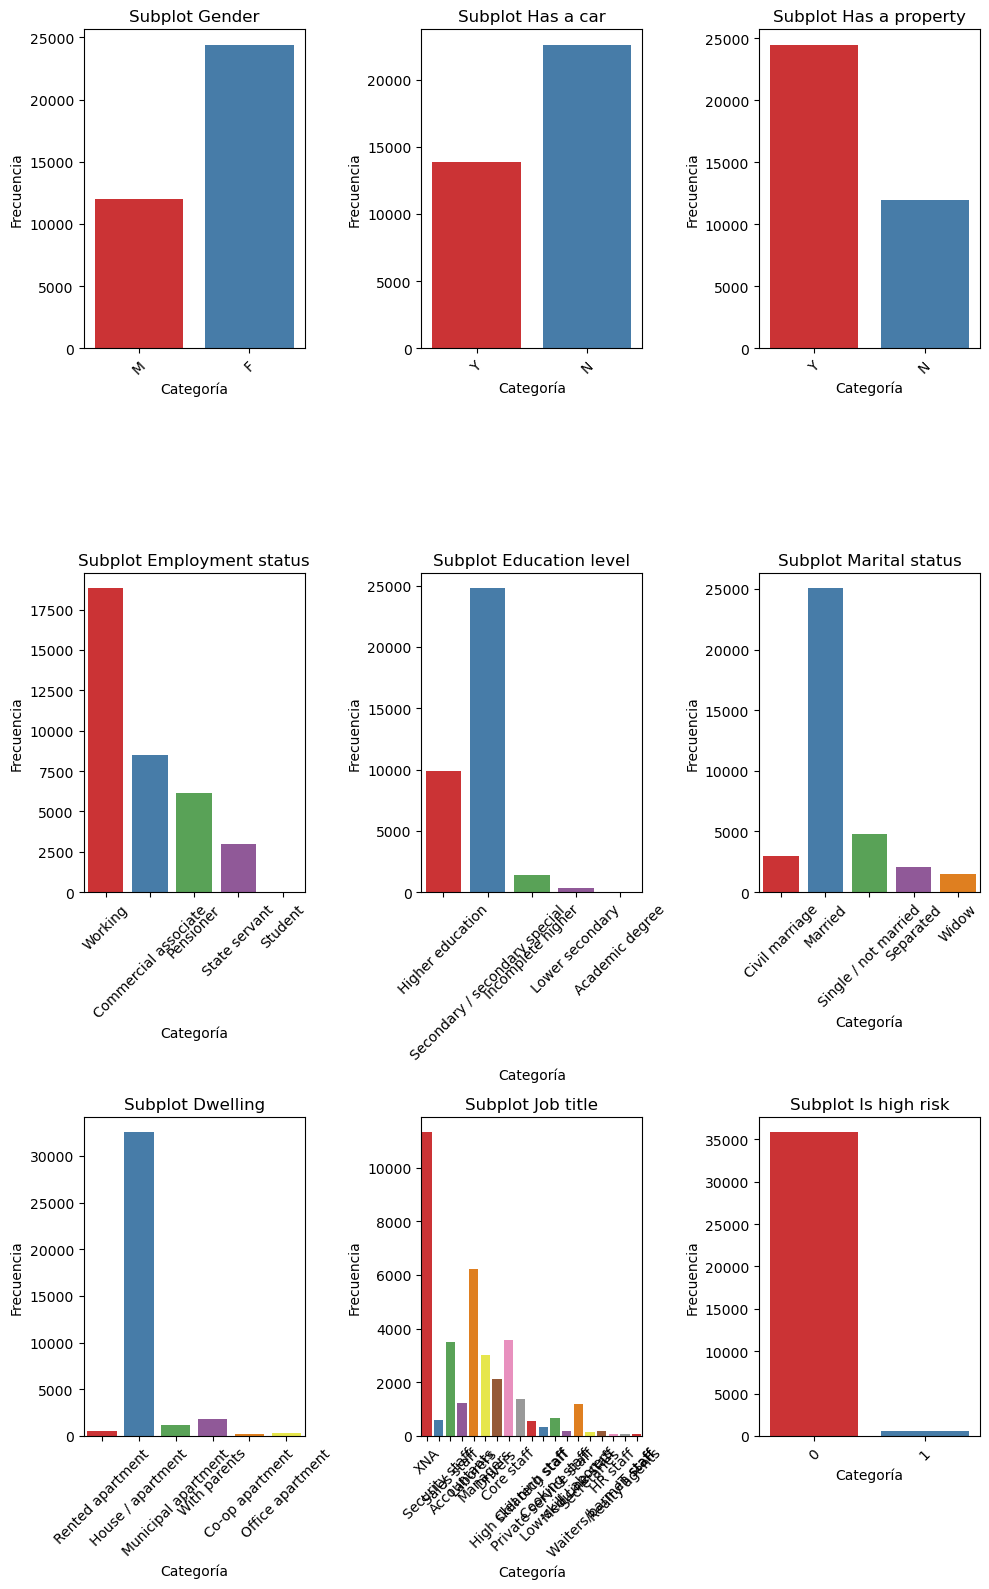

In [104]:
fig, ax = plt.subplots(3,3, figsize=(10,16))

for i, ax_row in enumerate(ax):
    for j, axes in enumerate(ax_row):
        sns.countplot(x=df[object_col[i * 3 + j]], ax=axes, palette="Set1")
        axes.set_xlabel("Categoría")
        axes.set_ylabel("Frecuencia")
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_title(f"Subplot {object_col[i * 3 + j]}")

plt.tight_layout()
plt.show()

The most common profile is of a married woman who owns a car and a house/apartment, currently working and with secondary education, and not risky.

<h1><b>Numerical Label Analysis

In [105]:
#define the numerical dataset
num_col = df.select_dtypes(['int','float']).columns
num_col

Index(['Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age'],
      dtype='object')

Before showing the graphs, we need to transform some labels in order to make it understandable:

In [106]:
#the data is expressed in negative days. We transform it to years
df['Age'] = np.abs(df['Age'])/365.25
df['Account age'] = np.abs(df['Account age'])

In [107]:
#similar thin happens to this label, but first we need to eliminate the data error
df['Employment length'].value_counts()

 365243    6135
-401         78
-1539        64
-200         63
-1678        61
           ... 
-4686         1
-2160         1
-2007         1
-758          1
-11272        1
Name: Employment length, Length: 3640, dtype: int64

The value of 365243 does not make sense and is repeated too many times to be reasonable. We transform this error to 0.

In [108]:
df_ret_idx = df['Employment length'][df['Employment length'] == 365243].index
# change 365243 to 0
df.loc[df_ret_idx,'Employment length'] = 0
#trasform the other negative values
df['Employment length'] = [np.abs(x)/365.25 if x<0 else x for x in df['Employment length']]

In this next plots we will be able to see how the target variable is distributed:

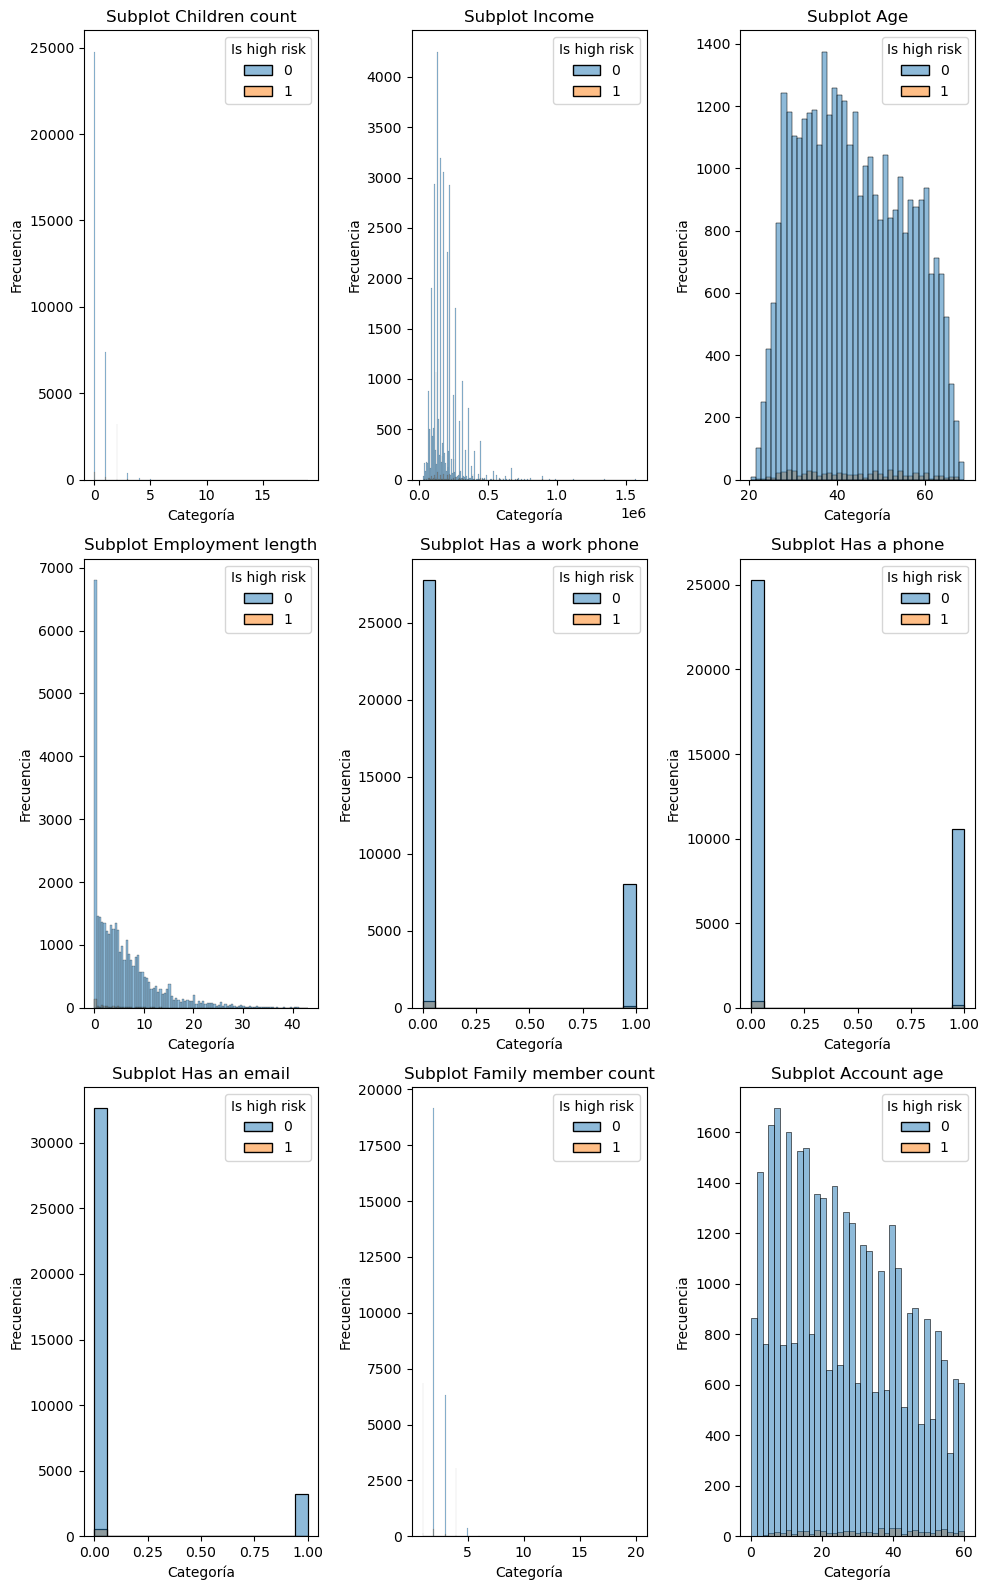

In [109]:
fig, ax = plt.subplots(3,3, figsize=(10,16))

for i, ax_row in enumerate(ax):
    for j, axes in enumerate(ax_row):
        sns.histplot(x=df[num_col[i * 3 + j]], ax=axes, hue = df['Is high risk'])
        axes.set_xlabel("Categoría")
        axes.set_ylabel("Frecuencia")
        axes.set_title(f"Subplot {num_col[i * 3 + j]}")

plt.tight_layout()
plt.show()

Now we will plot each variable against the others, to see if there is any correlation or how they are distributed, if we se anything strange...

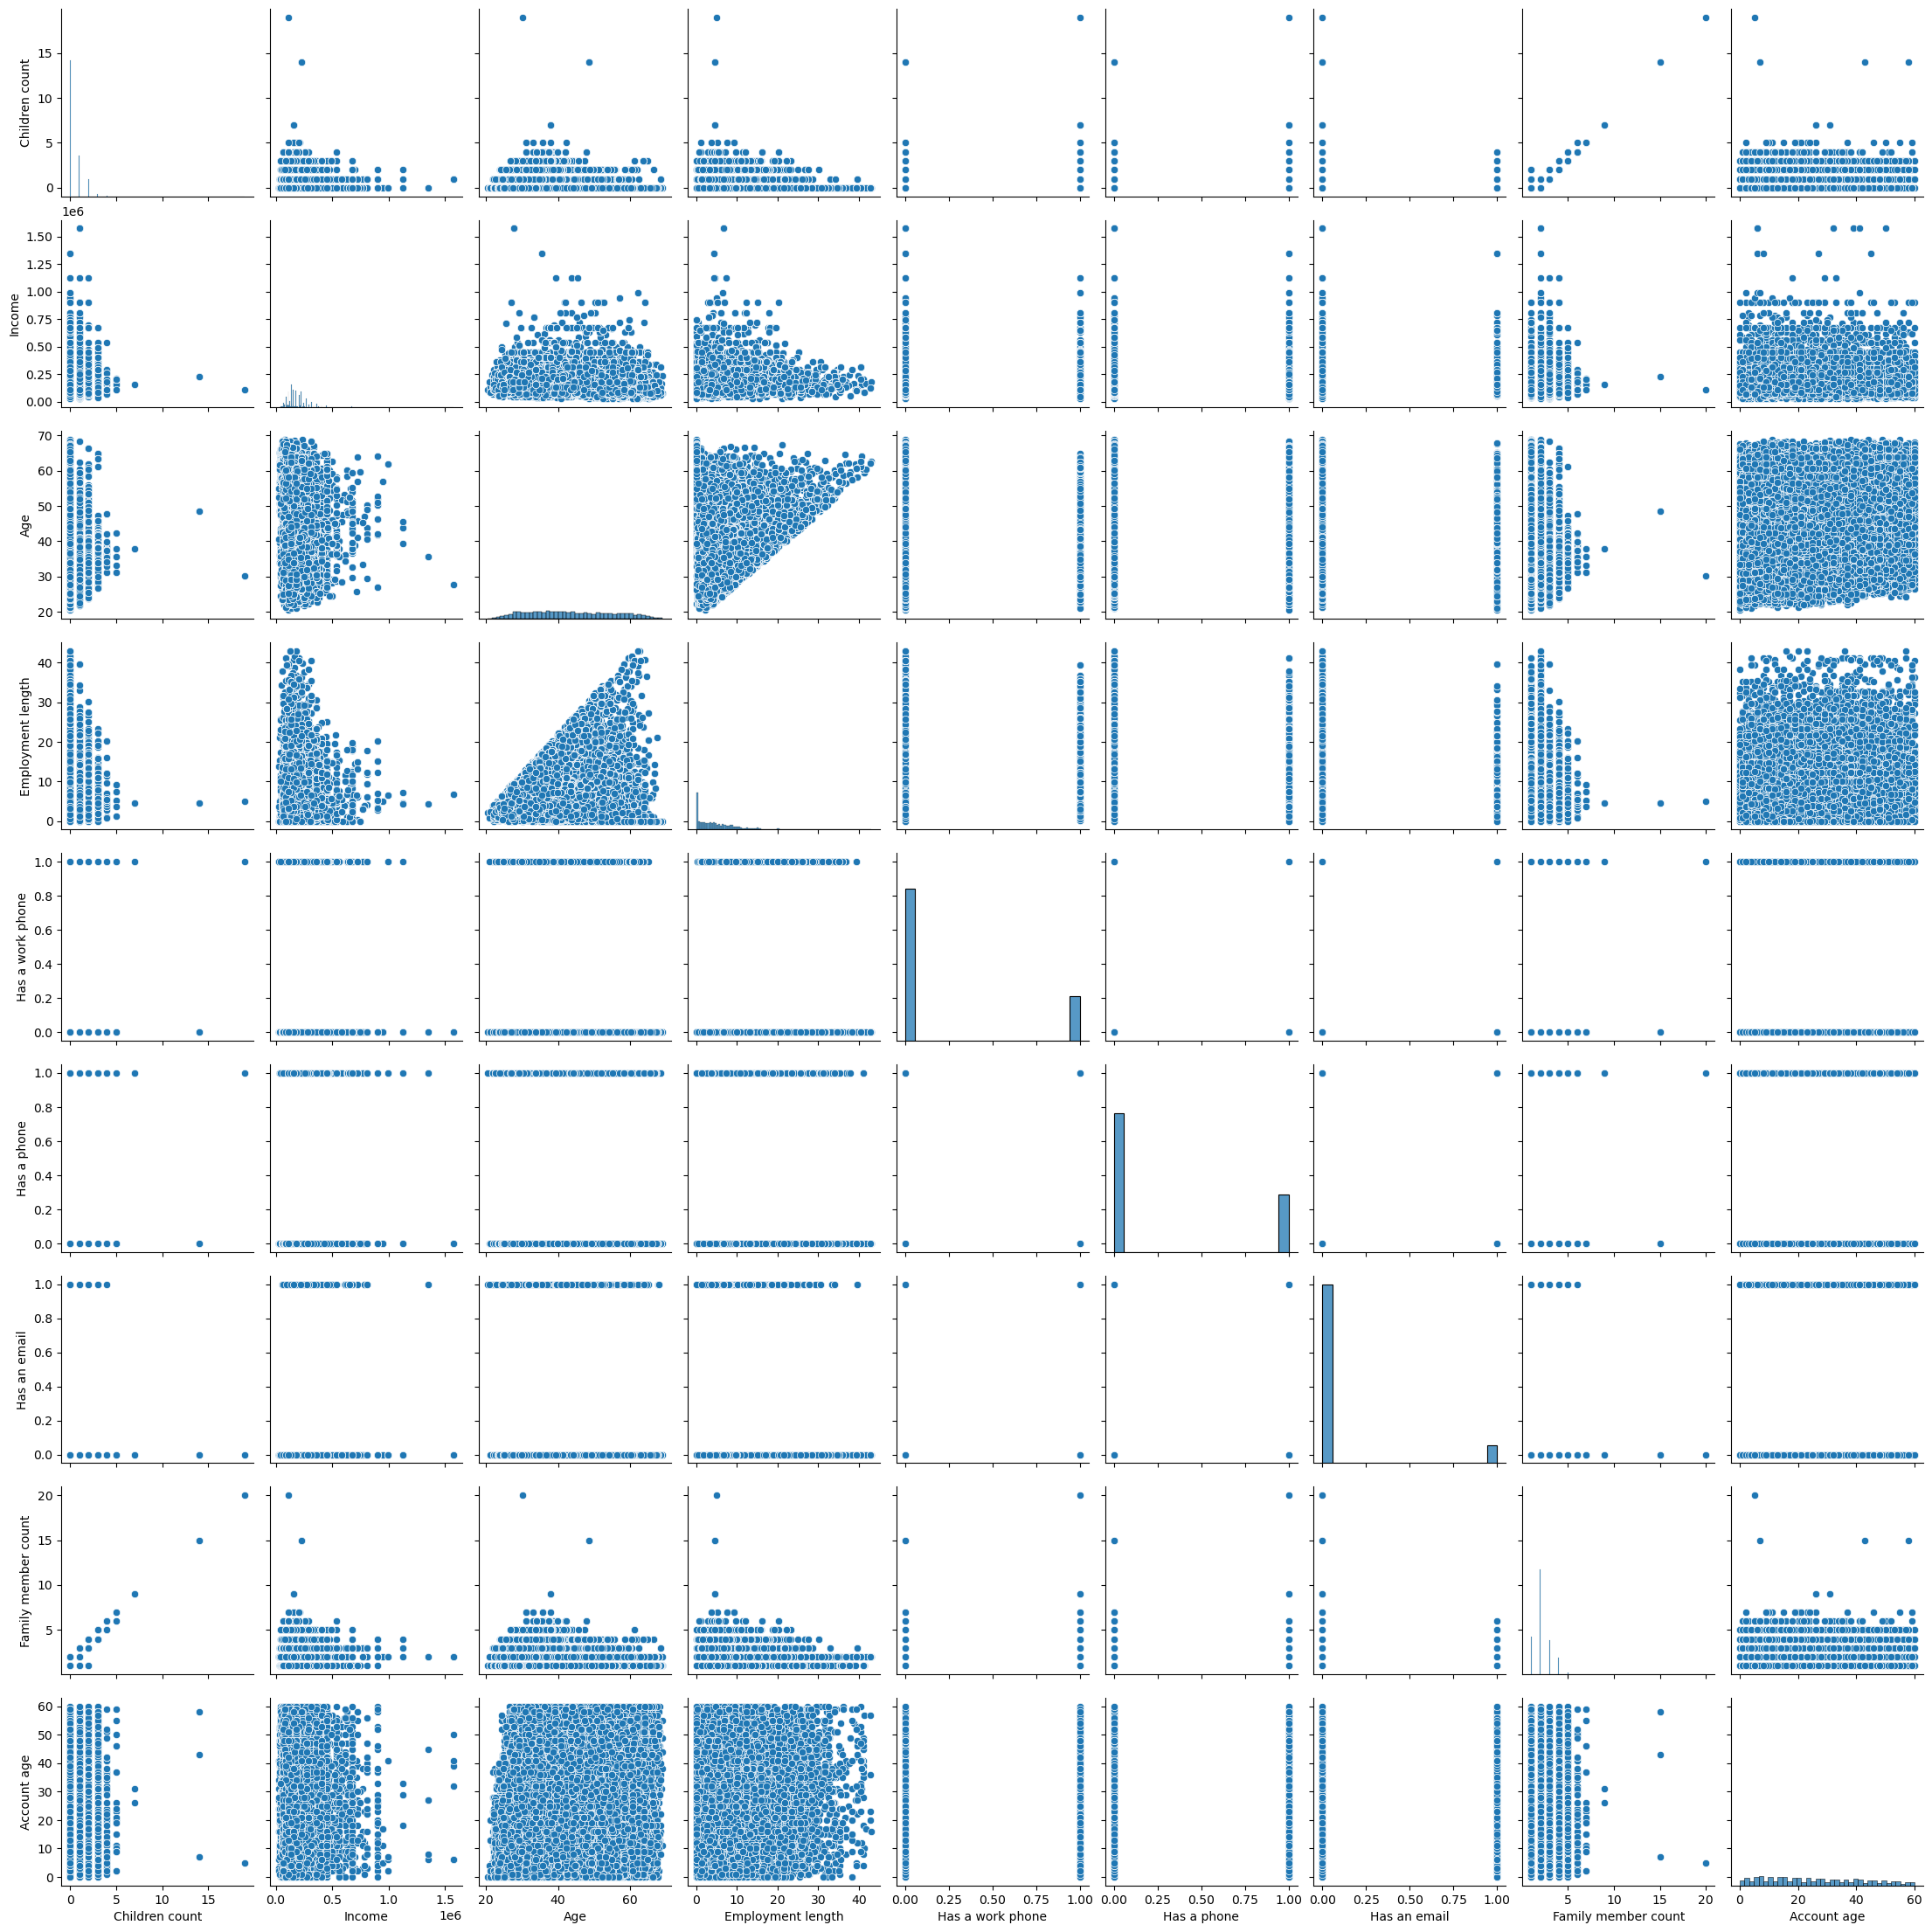

In [110]:
sns.pairplot(df[num_col])
#lets check if there is any correaltion between the labels

We can see that there is a clear linear correlation between Children Count and Family member count (which makes sense). We will drop one of both variables, since they bring same information to the model. The rest of variables seem to not be correlated.

In [111]:
df.drop('Family member count',inplace=True,axis=1)

In [112]:
#we also drop these, because Job title has many empty values, and account age was used to build the target variable
df.drop(['Job title','Account age'],inplace=True,axis=1)

<h1><b>Data Preparation

We will make some scaling for some numerical features in order to ease the job for the model:

In [113]:
from sklearn.preprocessing import  MinMaxScaler

minmax_var = ['Age', 'Income', 'Employment length']
for i in minmax_var:
    min_max_enc = MinMaxScaler()
    df[i] = min_max_enc.fit_transform(df[[i]])

Now we will change the categorical values into numerical. In order to do this we can use various methods, but since our categorical variables do not have inherent order (such as "Big", "Medium" or "Small"), we will use get_dummies method for those with more than 2 values, and LabelEncoder just for binning. Excepting the variable of Educational level, which does have an inherent order. For this, we will use mapping method.

In [114]:
#mapping method:
df['Education level'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education level, dtype: int64

In [115]:
#mapping method
order = {'Academic degree':0, 'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3, 'Higher education':4}
df['Education level'] = [order[x] for x in df['Education level']]

In [116]:
#labelencoder for binning method
from sklearn.preprocessing import LabelEncoder
object_col = df.select_dtypes(['object']).columns
label_encoder = LabelEncoder()

#for the categorical values with just 2 values:
object_col_1 = ['Gender', 'Has a car', 'Has a property','Is high risk']

for col in object_col_1:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

# this part of the code is just for plotting the correlation matrix, so that is understandable. We will not use this dataset any further
df_label = df.copy()
for col in object_col:
    df_label[col] = label_encoder.fit_transform(df[col])
df_label.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Is high risk
0,1,1,1,0,0.258721,4,4,0,4,0.255676,0.28906,1,0,0,0
1,1,1,1,0,0.258721,4,4,0,4,0.255676,0.28906,1,0,0,0
2,1,1,1,0,0.055233,4,2,1,1,0.791768,0.07217,0,0,0,0
3,0,0,1,0,0.156977,0,2,3,1,0.657929,0.19417,0,1,1,0
4,0,0,1,0,0.156977,0,2,3,1,0.657929,0.19417,0,1,1,0


In [117]:
#for categorical values with more than 2 values, get_dummies method:
df_encoded = pd.get_dummies(df, columns=['Employment status','Marital status','Dwelling'], prefix=['Employment status','Marital status','Dwelling'])
df_encoded.head()

,Gender,Has a car,Has a property,Children count,Income,Education level,Age,Employment length,Has a work phone,Has a phone,...,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_Co-op apartment,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,1,1,1,0,0.258721,4,0.255676,0.28906,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0.258721,4,0.255676,0.28906,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0.055233,2,0.791768,0.07217,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0.156977,2,0.657929,0.19417,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0.156977,2,0.657929,0.19417,0,1,...,0,0,1,0,0,1,0,0,0,0


Since the target variable is very small skewed towards the non-risky examples, we will address the class imbalance problem with SMOTE. I reached this conclusion after trying to modelize without SMOTE and seeing that the model result is very poor classifying Risky clients, so I concluded that I need more Risky clients data.

In [118]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(df_encoded.loc[:, df_encoded.columns != 'Is high risk'],df_encoded['Is high risk'])
df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)


We will modelize with this balanced dataset.

<h1><b>Variables Correlation with the Target Variable

<h1>Numerical Features: Pearson Correlation Matrix

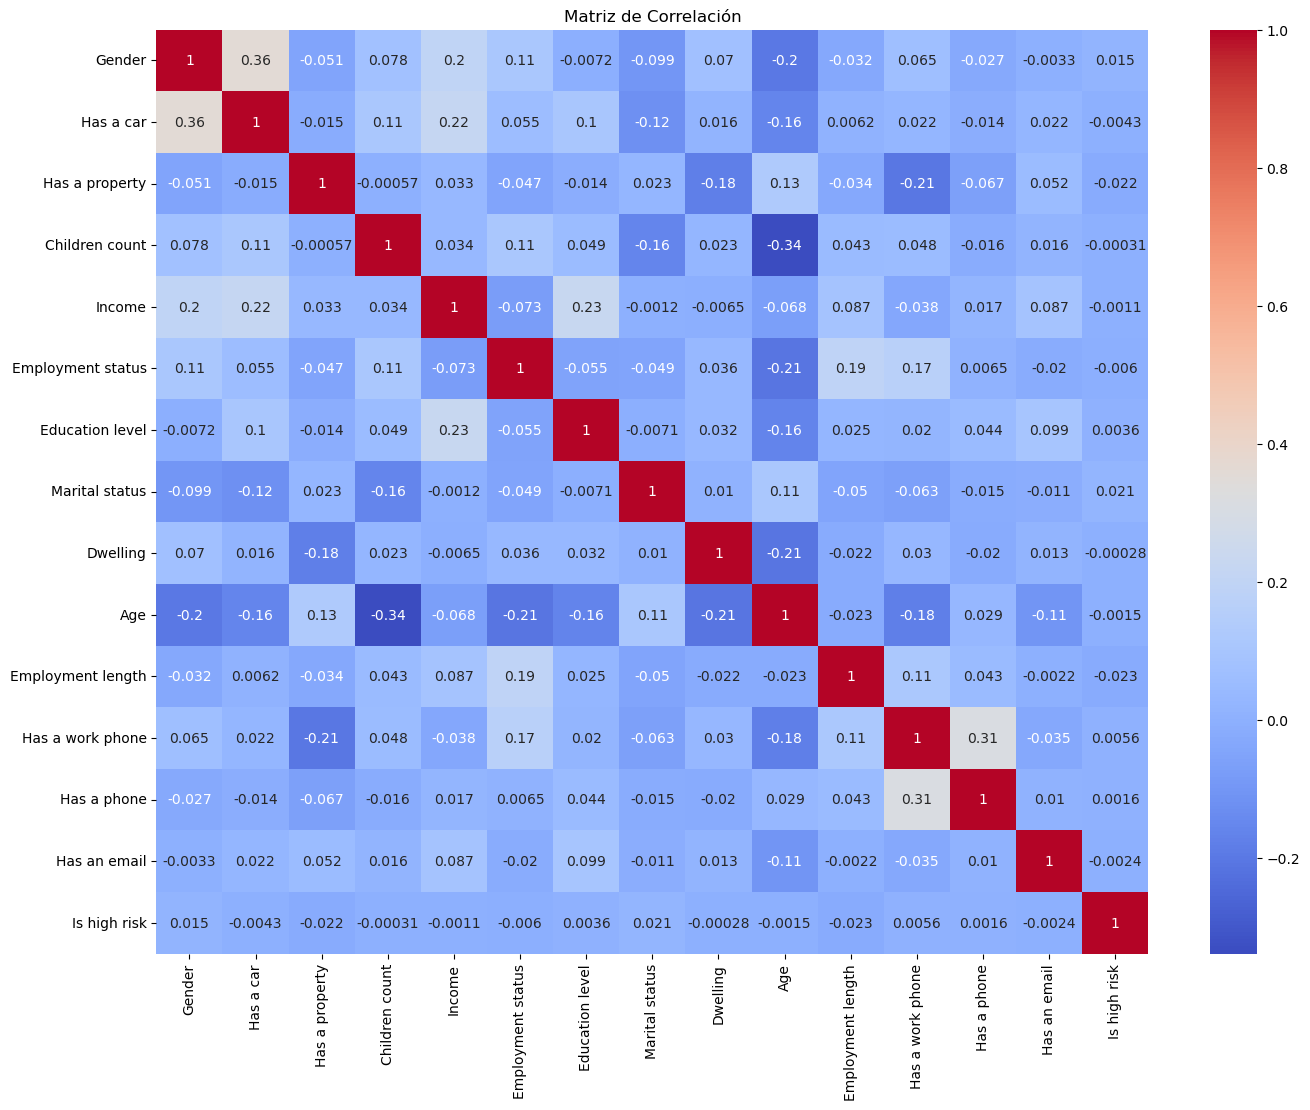

In [119]:
correlation_matrix = df_label.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

We can see that we do have some variables that are correlated, such as Age and Children Count, Has a phone and Has a work phone, or Has a car and Gender. Surprisingly, our target variable does not correlate at all with any of our variables.

<h1> Categorical Features: Chi-square test</h1>

Null hypothesis: the feature's categories have no effect on the target variable. Alternate hypothesis: one (or more) of the feature categories has a significant effect on the target variable.

In [120]:
import scipy.stats as stats

def chi_func(feature):
    # selection row with high risk
    high_risk_ft = df[df['Is high risk'] == 1][feature]
    high_risk_ft_ct = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    high_risk_ft_ct.index.name = None
    # observe values
    obs = high_risk_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')
        
cat_ft = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling']
for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** Gender ****

Observed values:

   Count
0    379
1    237


Int64Index([0, 1], dtype='int64')
Expected values:

   Count
0  308.0
1  308.0


Chi-square:

32.73376623376623


Critical value:

3.841458820694124


P-value:

[1.05685264e-08]


Reject the null hypothesis


**** Has a car ****

Observed values:

   Count
0    392
1    224


Int64Index([0, 1], dtype='int64')
Expected values:

   Count
0  308.0
1  308.0


Chi-square:

45.81818181818182


Critical value:

3.841458820694124


P-value:

[1.29753985e-11]


Reject the null hypothesis


**** Has a property ****

Observed values:

   Count
0    251
1    365


Int64Index([0, 1], dtype='int64')
Expected values:

   Count
0  308.0
1  308.0


Chi-square:

21.0974025974026


Critical value:

3.841458820694124


P-value:

[4.36519411e-06]


Reject the null hypothesis


**** Employment status ****

Observed values:

                      Count
Commercial associate    143
Pensioner               130
State servant            37
Working

All of the categorical variables we have tested rejects the null hypothesis, therefore, probably these variables will play a role on building the model for prediction.

<h1><b>MODELLING

In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


classifiers = {
    'sgd':SGDClassifier(random_state=2,loss='perceptron'),
    'logistic_regression':LogisticRegression(random_state=2,max_iter=1000),
    'support_vector_machine':SVC(random_state=2,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=2),
    'random_forest':RandomForestClassifier(random_state=2),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=2),
    'neural_network (Multilayer Perceptron)':MLPClassifier(random_state=2,max_iter=1000),
    'adaboost':AdaBoostClassifier(random_state=2)
    }


X = df_bal.drop(['Is high risk'],axis=1)
y = df_bal['Is high risk'].astype('int64')
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

In [40]:
# Function to plot the confusion matrix for a given model
def confusion_matrix_func(model_trn,model_name):
    fig, ax = plt.subplots(figsize=(8,8))
    #plot confusion matrix
    conf_matrix = ConfusionMatrixDisplay.from_predictions(y_train,y_prediction_func(model_trn,model_name),ax=ax, cmap='Blues',values_format='d')
    # remove the grid
    plt.grid(visible=None)
    # increase the font size of the x and y labels
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)
    #give a title to the plot using the model name
    plt.title('Confusion Matrix', fontsize=14)
    #show the plot
    plt.show()
    print('\n')
    
def plot_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]  # Getting predicted probabilities for positive class
    fpr, tpr, _ = roc_curve(y, y_pred_prob)  # Calculating ROC curve values
    auc_score = roc_auc_score(y, y_pred_prob)  # Calculating AUC (Area Under the Curve) score

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Random Guess line (diagonal)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [41]:
# Function to get the y prediction
def y_prediction_func(model_trn,model_name):
    
    y_pred = cross_val_predict(model_trn,X_train,y_train,cv=10,n_jobs=-1)
    #save the predictions
    return y_pred

# Function to train the model
def train_model(model,model_name):
    if model_name == 'sgd':
        # for sgd, loss = 'hinge' does not have a predict_proba method. Therefore, we use a calibrated model
        calibrated_model = CalibratedClassifierCV(model, cv=10, method='sigmoid')
        model_trn = calibrated_model.fit(X_train,y_train)
    else:
        model_trn = model.fit(X_train,y_train)
    return model_trn
#funtion to show the classification report of the model
def score_func(model_trn, model_name):
    class_report_final = classification_report(y_train,y_prediction_func(model_trn,model_name))
    print(class_report_final)

In [42]:
df

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Is high risk
0,1,1,1,0,0.258721,Working,4,Civil marriage,Rented apartment,0.255676,0.289060,1,0,0,0
1,1,1,1,0,0.258721,Working,4,Civil marriage,Rented apartment,0.255676,0.289060,1,0,0,0
2,1,1,1,0,0.055233,Working,2,Married,House / apartment,0.791768,0.072170,0,0,0,0
3,0,0,1,0,0.156977,Commercial associate,2,Single / not married,House / apartment,0.657929,0.194170,0,1,1,0
4,0,0,1,0,0.156977,Commercial associate,2,Single / not married,House / apartment,0.657929,0.194170,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,0.186047,Working,2,Married,House / apartment,0.558172,0.154013,0,0,0,1
36453,0,0,1,0,0.084302,Commercial associate,4,Married,House / apartment,0.277303,0.084325,0,1,1,1
36454,0,0,1,0,0.084302,Pensioner,4,Married,House / apartment,0.277303,0.084325,0,1,1,1
36455,0,0,1,0,0.165698,Working,2,Married,House / apartment,0.592708,0.041685,0,0,0,1






----------------------  sgd  ----------------------


              precision    recall  f1-score   support

           0       0.60      0.76      0.67     28672
           1       0.67      0.49      0.56     28673

    accuracy                           0.62     57345
   macro avg       0.63      0.62      0.62     57345
weighted avg       0.63      0.62      0.62     57345



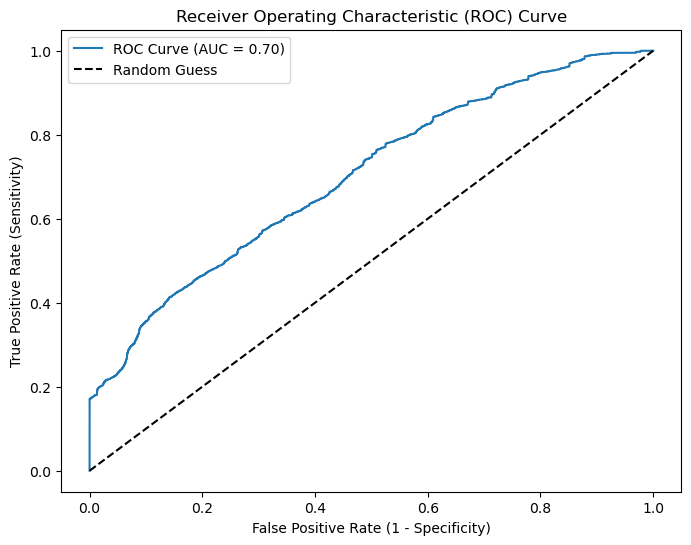

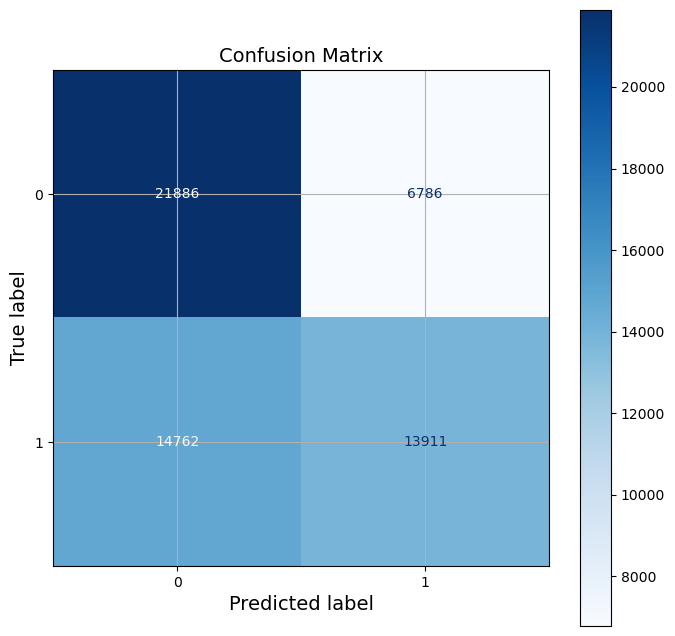







----------------------  logistic_regression  ----------------------


              precision    recall  f1-score   support

           0       0.63      0.67      0.65     28672
           1       0.65      0.60      0.62     28673

    accuracy                           0.64     57345
   macro avg       0.64      0.64      0.64     57345
weighted avg       0.64      0.64      0.64     57345



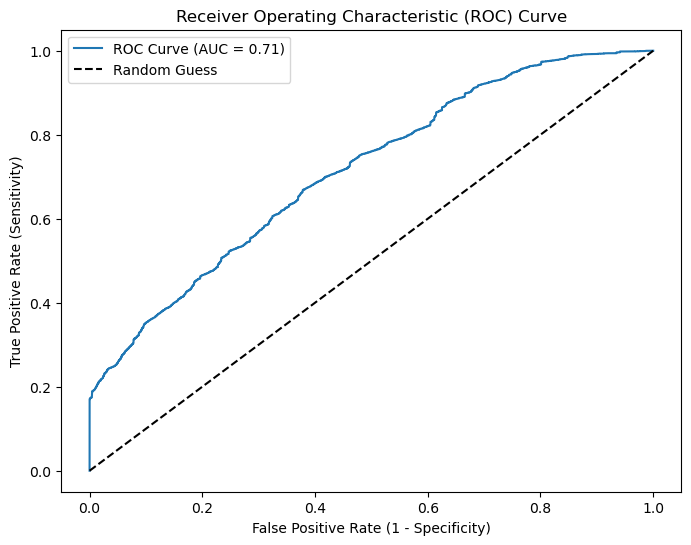

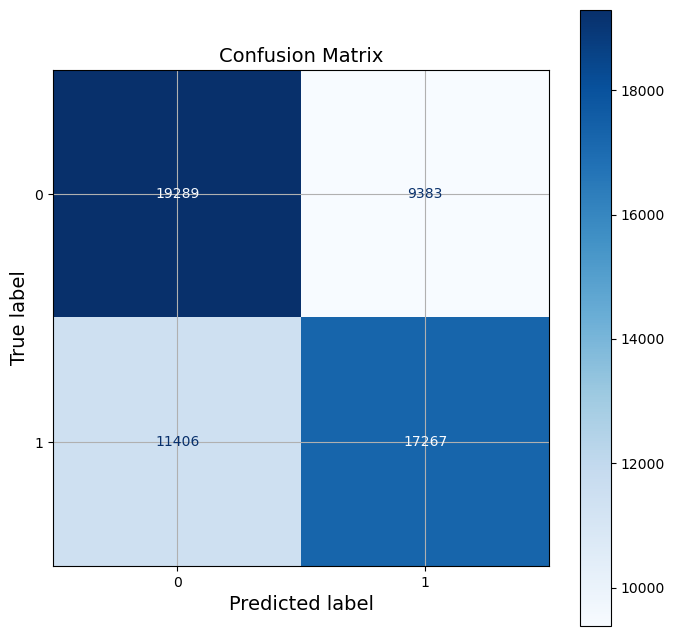







----------------------  decision_tree  ----------------------


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28672
           1       0.97      0.96      0.97     28673

    accuracy                           0.97     57345
   macro avg       0.97      0.97      0.97     57345
weighted avg       0.97      0.97      0.97     57345



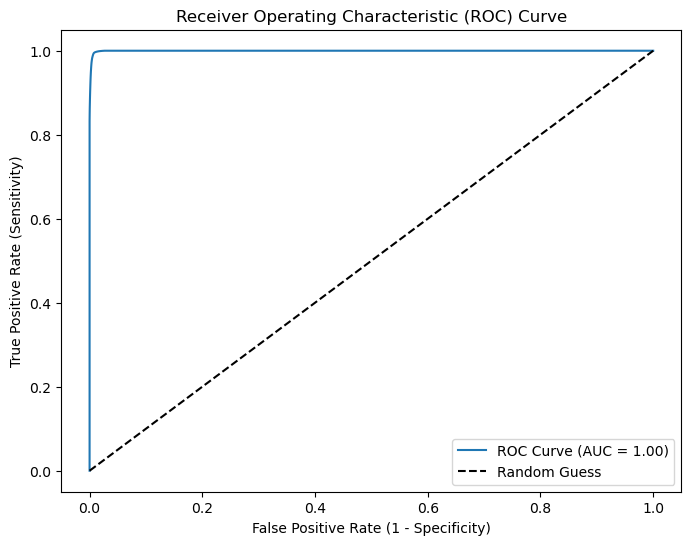

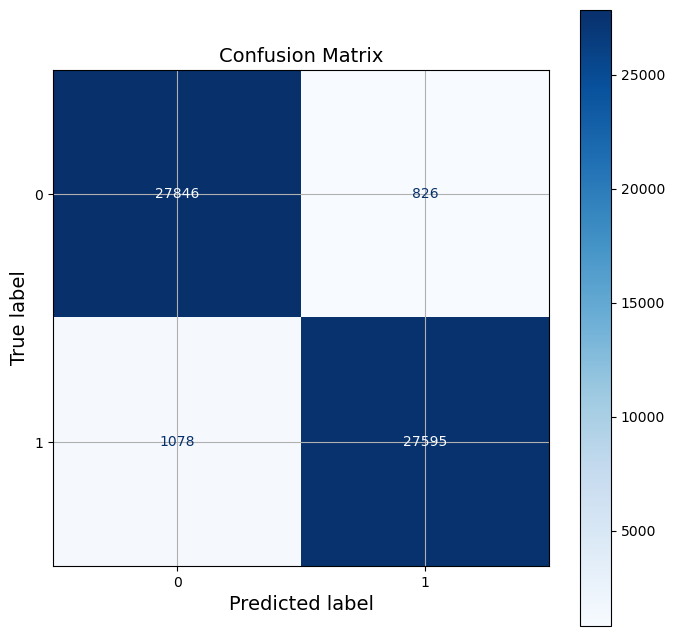







----------------------  random_forest  ----------------------


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28672
           1       0.98      0.98      0.98     28673

    accuracy                           0.98     57345
   macro avg       0.98      0.98      0.98     57345
weighted avg       0.98      0.98      0.98     57345



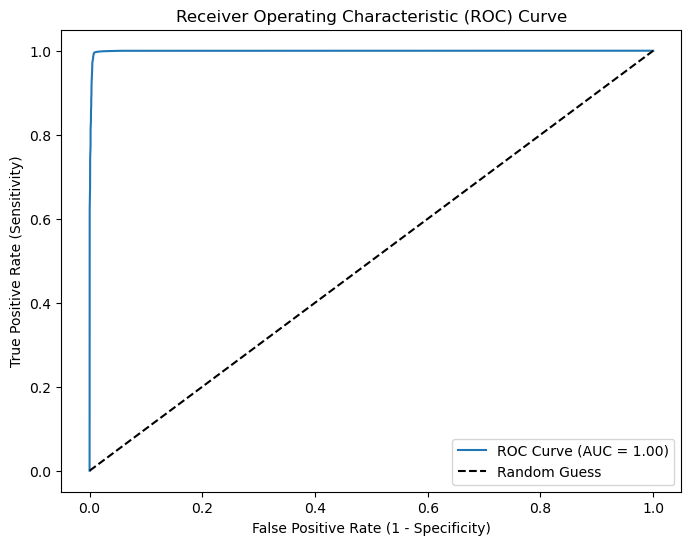

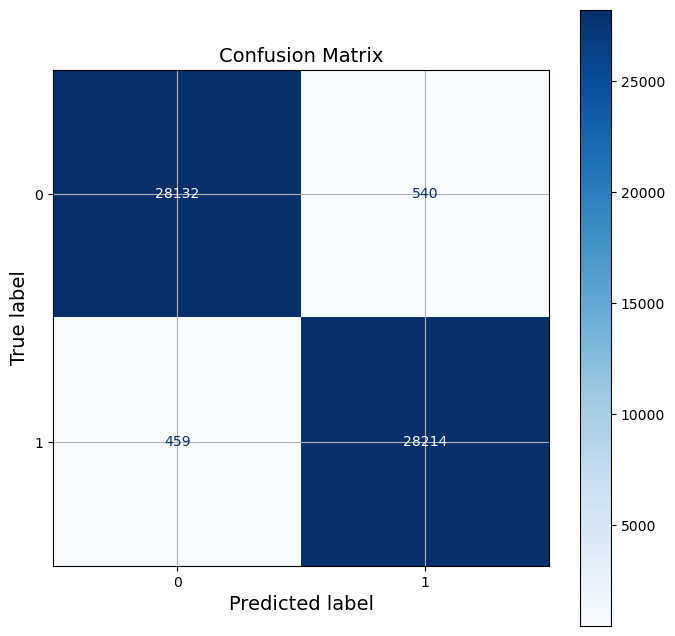







----------------------  k_nearest_neighbors  ----------------------


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     28672
           1       0.94      0.97      0.95     28673

    accuracy                           0.95     57345
   macro avg       0.95      0.95      0.95     57345
weighted avg       0.95      0.95      0.95     57345



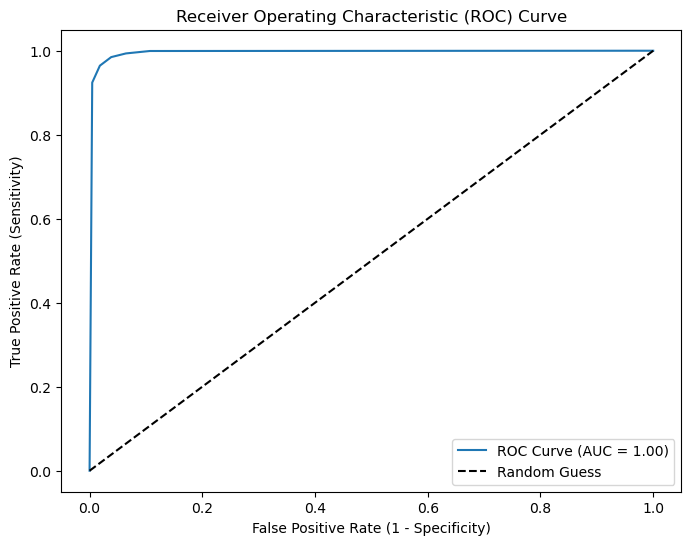

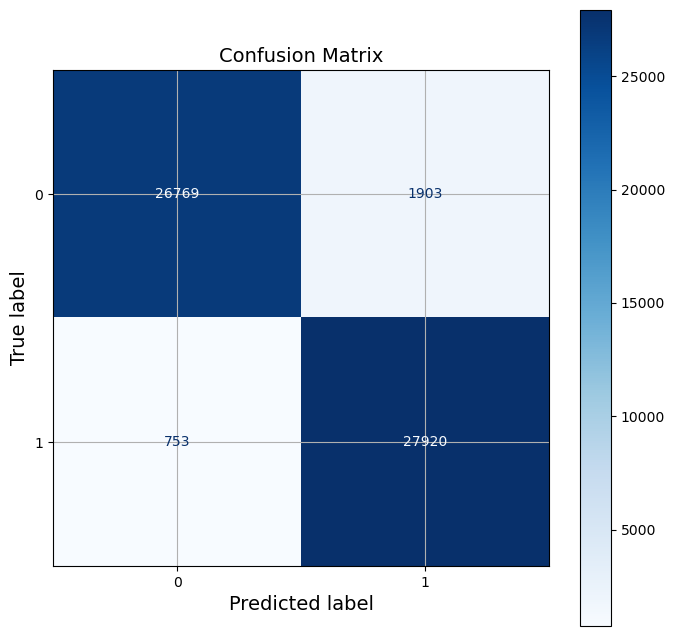







----------------------  gradient_boosting  ----------------------


              precision    recall  f1-score   support

           0       0.84      0.80      0.82     28672
           1       0.81      0.85      0.83     28673

    accuracy                           0.82     57345
   macro avg       0.82      0.82      0.82     57345
weighted avg       0.82      0.82      0.82     57345



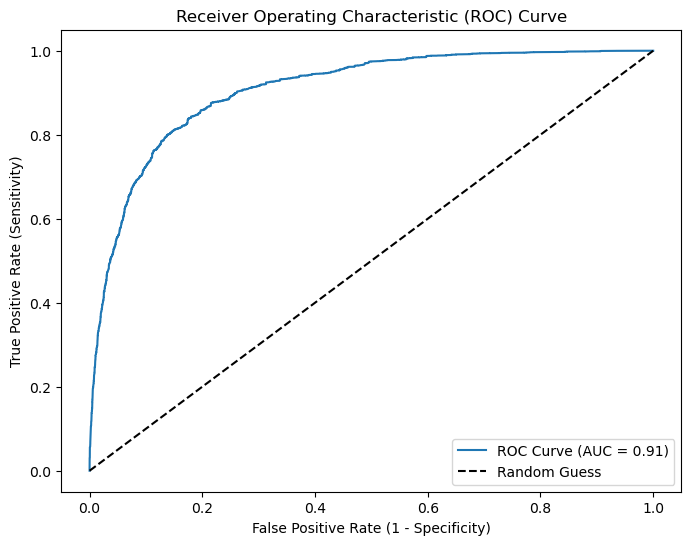

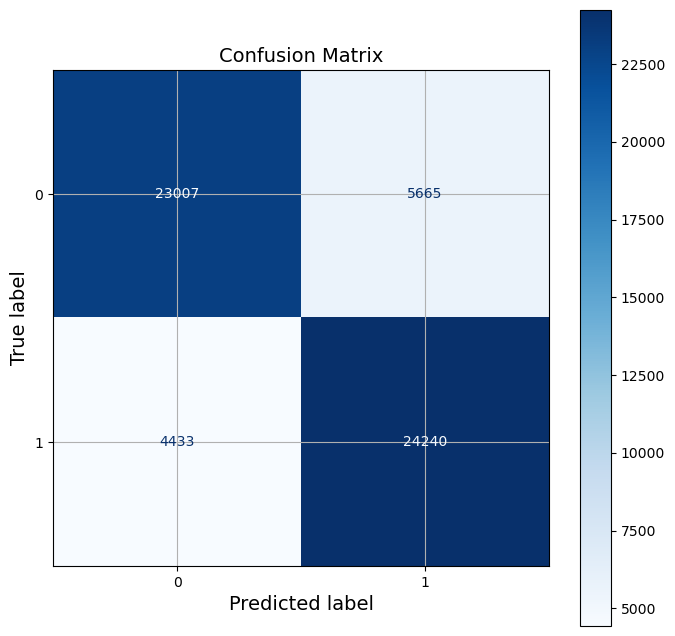







----------------------  adaboost  ----------------------


              precision    recall  f1-score   support

           0       0.74      0.67      0.71     28672
           1       0.70      0.76      0.73     28673

    accuracy                           0.72     57345
   macro avg       0.72      0.72      0.72     57345
weighted avg       0.72      0.72      0.72     57345



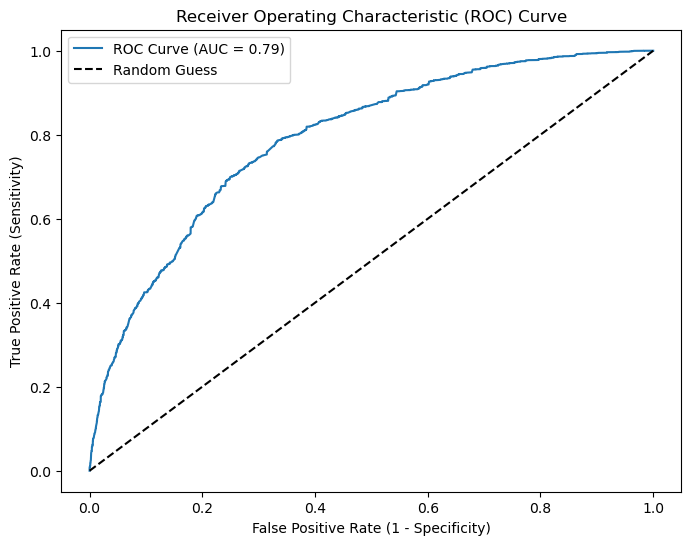

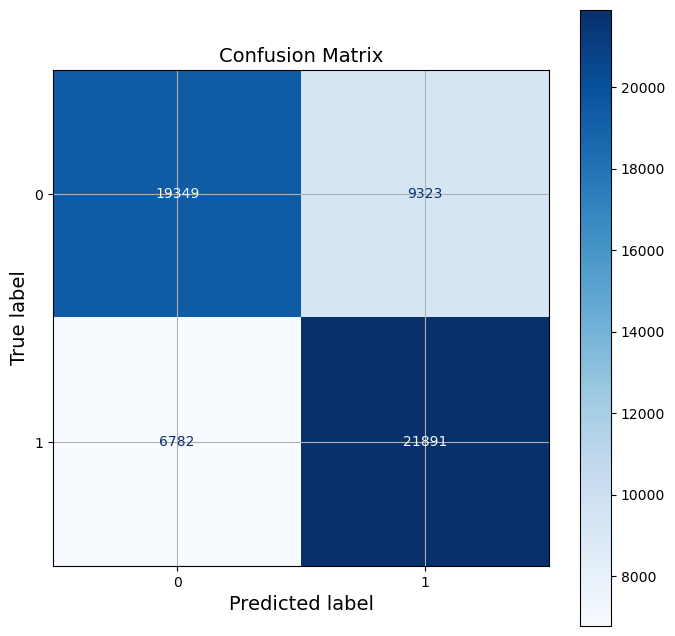

In [43]:
# loop over all the models
import warnings

for model_name,model in classifiers.items():
    # title formatting
    print('\n')
    print('\n')
    print('  {}  '.center(50,'-').format(model_name))
    print('\n')

    # train the model
    model_trn = train_model(model,model_name)
    # print the scores from the classification report
    score_func(model_trn, model_name)
    # plot the ROC curve
    plot_roc_curve(model_trn, X_train, y_train)
    # plot the confusion matrix
    confusion_matrix_func(model_trn,model_name)
    # plot feature importance
    warnings.filterwarnings("ignore")

Seems like the best model is random_forest, with a recall and precision of 0.98

<h1>Predicitons

Now we will give the model data that has not seen, and see how it predicst:

In [44]:
# train the model
model_trn = train_model(classifiers['random_forest'],'random_forest')
final_predictions = model_trn.predict(X_test)
n_correct = sum(final_predictions == y_test)
print(n_correct/len(final_predictions))

0.9832600962544465


Really good outcome, nearly perfect prediction.

Lets see which features are the most important ones for approving a loan or not.

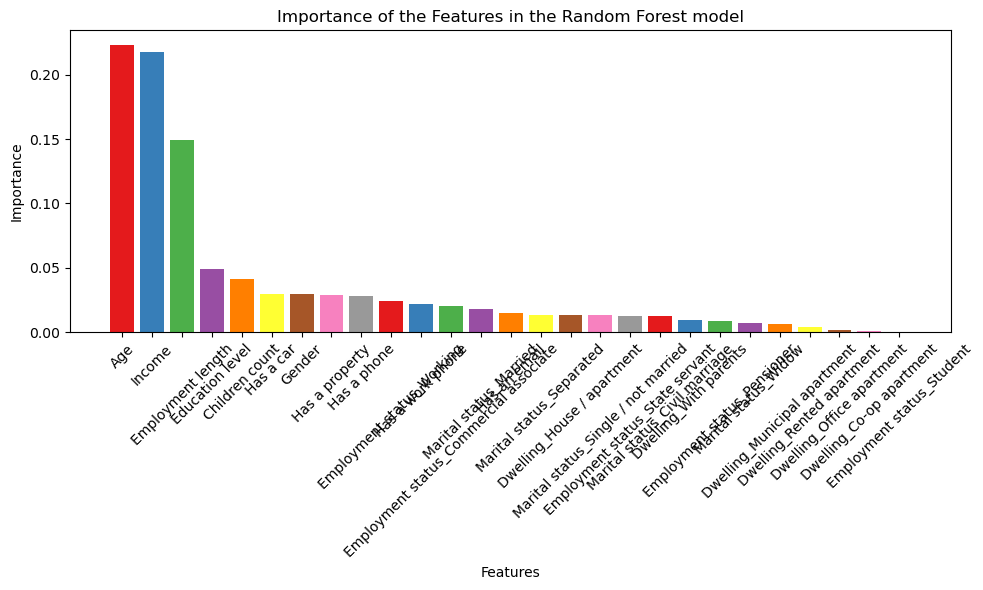

In [138]:
#feature importance:
feat = pd.DataFrame({'Features': df_bal.columns[:-1],'Importance':model_trn.feature_importances_})
feat = feat.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
colors = sns.color_palette("Set1", n_colors=len(feat))
plt.bar(feat['Features'], feat['Importance'],color=colors)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of the Features in the Random Forest model')
plt.tight_layout()
plt.show()


<b>Key findings</b>: People with the highest age and income, and who have a significant time employed, are more likely to be approved for a credit card.